# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
****

## imports for Python, Pandas

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [2]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [3]:
# use normalization to create tables from nested element
pd.json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [4]:
# further populate tables created from nested element
pd.json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 

In [5]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [6]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [7]:
# Load the full file as a pandas dataframe and examine info for counts to see missing data
proj_df = pd.read_json('data/world_bank_projects.json')
proj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sector                    500 non-null    object
 1   supplementprojectflg      498 non-null    object
 2   projectfinancialtype      500 non-null    object
 3   prodline                  500 non-null    object
 4   mjtheme                   491 non-null    object
 5   idacommamt                500 non-null    int64 
 6   impagency                 472 non-null    object
 7   project_name              500 non-null    object
 8   mjthemecode               500 non-null    object
 9   closingdate               370 non-null    object
 10  totalcommamt              500 non-null    int64 
 11  id                        500 non-null    object
 12  mjsector_namecode         500 non-null    object
 13  docty                     446 non-null    object
 14  sector1                   

In [8]:
#get countries with the most projects
top_proj = proj_df.groupby(proj_df.country_namecode).count().nlargest(10, 'countrycode')

#only need one column of counts
top_proj = top_proj['sector']

#make back into a dataframe with a better name for its columns
top_proj = pd.DataFrame(top_proj).rename(columns={'sector': 'number_of_projects'})
top_proj.index.name = 'country'

#make country more readable
top_proj.index = top_proj.index.str.split('!').str.get(0)
top_proj


,number_of_projects
country,
People's Republic of China,19
Republic of Indonesia,19
Socialist Republic of Vietnam,17
Republic of India,16
Republic of Yemen,13
Kingdom of Morocco,12
Nepal,12
People's Republic of Bangladesh,12
Africa,11


This is the first attempt to find the top themes:

In [9]:
#create an empty theme dictionary
theme_dict = {}

#iterate through rows of the data frame, knowing the themes cells contain lists of dictionaries
for index, row in proj_df.iterrows():
    themes = row['mjtheme_namecode']
    for item in themes:
        name = item['name'].strip()
        code = item['code']
        #keep count of themes found, and update name when found
        if code not in theme_dict.keys():
            if (name != ''):
                theme_dict[code] = {'name' : name, 'count' : 1}
            else:
                theme_dict[code] = {'name' : '', 'count' : 1}
        else:
            if (theme_dict[code]['name'] == ''):
                if (name != ''):
                    theme_dict[code]['name'] = name
            theme_dict[code]['count'] += 1
#turn themes dictionary into datafrome and get the top ten
top_themes = pd.DataFrame.from_dict(theme_dict, orient='index').sort_values(by='count', ascending=False).head(10)
top_themes

,name,count
11,Environment and natural resources management,250
10,Rural development,216
8,Human development,210
2,Public sector governance,199
6,Social protection and risk management,168
4,Financial and private sector development,146
7,Social dev/gender/inclusion,130
5,Trade and integration,77
9,Urban development,50
1,Economic management,38


But with json_normalize I can do this without loops.

In [19]:
#load json file as json object
with open('data/world_bank_projects.json') as file:
    data = json.load(file)
    
#normalize the data I'm interested in
norm_proj = pd.json_normalize(data, record_path=['mjtheme_namecode'])

#get the top codes
top_norm_proj = norm_proj.groupby('code').count().sort_values('name', ascending=False).head(10)
top_norm_proj



,name
code,
11,250
10,216
8,210
2,199
6,168
4,146
7,130
5,77
9,50


Codes aren't that readable without names, though, so let's translate

In [11]:
#make list of top code names
top_theme_names = []
for index, row in top_norm_proj.iterrows():
    top_theme_names.append(theme_dict[index]['name'])
    
#add list as new column
top_norm_proj['theme_name'] = top_theme_names

#fix column names
top_norm_proj = top_norm_proj.rename(columns={'name' :'number_of_projects'})
top_norm_proj

,number_of_projects,theme_name
code,,
11,250,Environment and natural resources management
10,216,Rural development
8,210,Human development
2,199,Public sector governance
6,168,Social protection and risk management
4,146,Financial and private sector development
7,130,Social dev/gender/inclusion
5,77,Trade and integration
9,50,Urban development


Let's fix names in the normed dataframe

In [12]:
#fix missing names in norm_proj
for index, row in norm_proj.iterrows():
    name = row['name']
    code = row['code']
    if row['name'].strip() == '':
        row['name'] = theme_dict[code]['name']
        
norm_proj

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
...,...,...
1494,10,Rural development
1495,9,Urban development
1496,8,Human development
1497,5,Trade and integration


But this isn't super useful for anything but counting themes--it might be better to fix it in the original dataframe, proj_df

In [13]:
#define a function to count empty theme names so I can tell if I'm successful
def count_empty_theme_name(df):
    count = 0;
    for index, row in df.iterrows():
        themes = row['mjtheme_namecode']
        for item in themes:
            name = item['name'].strip()
            if name == '':
                count += 1
    return count

print('Number of empty theme names: ' + str(count_empty_theme_name(proj_df)))

Number of empty theme names: 122


In [14]:
#iterate through rows of the proj_df, update missing values when found, knowing the themes cells contain lists of dictionaries
for index, row in proj_df.iterrows():
    themes = row['mjtheme_namecode']
    for item in themes:
        name = item['name'].strip()
        code = item['code']
        #if name is missing, update it
        if (name == ''):
            item['name'] = theme_dict[code]['name']
print('Number of empty theme names: ' + str(count_empty_theme_name(proj_df)))

Number of empty theme names: 0


And I should probably try normalizing with more columns

In [15]:
#load json file as json object
with open('data/world_bank_projects.json') as file:
    data = json.load(file)
    
#normalize the data I'm interested in and sort by code to make filling empties easier
norm_proj = pd.json_normalize(data, 'mjtheme_namecode', ['countryname']).sort_values('code')
norm_proj = norm_proj.set_index('code')

#fix missing theme names
norm_proj = norm_proj.replace(r'^\s*$', np.nan, regex=True)
norm_proj['name'].fillna(method='ffill', inplace=True)

#test to make sure no empty names
norm_proj[(norm_proj.name == '') | (norm_proj.name is None)]

,name,countryname
code,,


Some plots

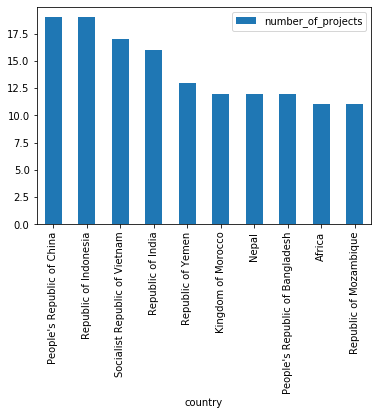

In [16]:
#plot top projects

top_proj.plot(kind='bar')

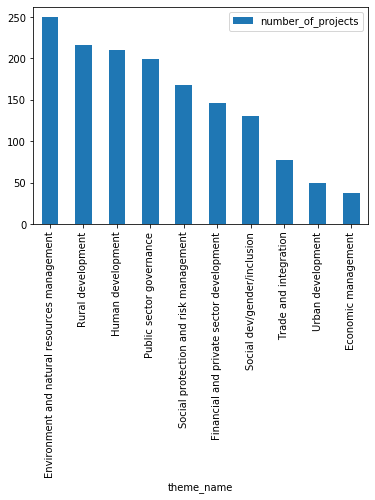

In [17]:
#plot top themes

top_norm_proj.plot(x='theme_name', y='number_of_projects', kind='bar')